<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Clustering_Algorithms_Imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Courtesy Reference:** https://builtin.com/articles/dbscan#:~:text=What%20Is%20DBSCAN%3F-,Density%2Dbased%20spatial%20clustering%20of%20applications%20with%20noise%20(DBSCAN),data%20cleaning%20and%20outlier%20detection.

#DBSCAN: Density-based Spatial Clustering of Applications with Noise

####Advantages of DBSCAN
- It can identifies clusters of any shape, more versitile than **K-Mean** or **heirarchical clustering**
- Very effective in **anamoly detection**: applicable in data cleaning & outlier detection
- Parameter-free algorithm, it can specify the no. of clusters automatically, applied where optimal number of clusters is unknown/ defficult to determine
- Scalable algorithm with complexity O(n.logn)

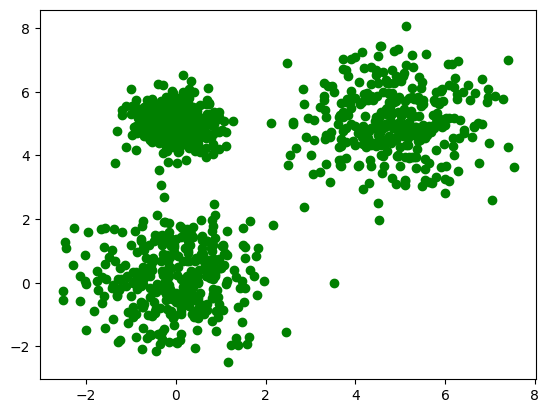

In [6]:
#Generate dummy data
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generation of nested dummy data
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

plt.scatter(X[:,0], X[:,1], color='green')
plt.show()

In [8]:
#Add the model
from sklearn.cluster import DBSCAN

# model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# the number of clusters found by DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

Number of clusters found by DBSCAN: 3


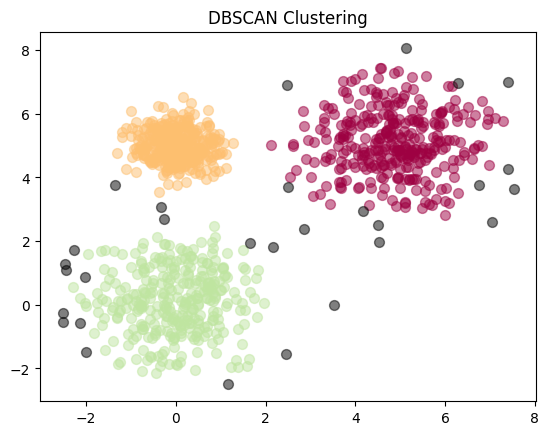

In [9]:
#Let's plot the clusters
import numpy as np

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()

In [10]:
# attributes of the dbscan object
print("Indices of core samples: ", dbscan.core_sample_indices_)
print("Copy of each core sample found by training: ", dbscan.components_)
print("Labels: ", dbscan.labels_)
print("Number of features seen during fit: ", dbscan.n_features_in_)

Indices of core samples:  [  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38
  39  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76
  77  78  79  80  81  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 117 118 119 121 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 139 140 142 143 144 145 146 147 148 149 150 151 152 153 154
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 228 229
 230 231 232 233 234 235 236 237 238 239 240 242 243 246 247 248 249 250
 251 252 253 254 255 256 